<a href="https://colab.research.google.com/github/vannguyenhoai43-hash/ecommerce-category-growth-analysis/blob/main/notebooks/01_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Phần 1:Phân tích tăng trưởng theo ngành hàng Level 1**

Tại bước này, dữ liệu được tổng hợp theo ngành hàng Level 1 để đánh giá mức độ tăng trưởng tổng quan.

**Các chỉ số tính toán:**

- Chênh lệch tuyệt đối ADO & GMV theo MoM ( diff_ado, diff_gmv)

- Tốc độ tăng trưởng tương đối (% MoM)

Nhóm theo ngành hàng level 1

**Mục tiêu là xác định:**

- Ngành hàng nào đóng góp lớn vào tăng trưởng chung

- Xu hướng tăng trưởng đến từ volume (ADO) hay từ giá trị đơn hàng (GMV)

**Thực hiện:**

- Nhóm theo Level 1

- Tính toán MoM

- Trực quan hóa bằng biểu đồ kết hợp

### Upload data

In [119]:
!git clone https://github.com/vannguyenhoai43-hash/ecommerce-category-growth-analysis.git

Cloning into 'ecommerce-category-growth-analysis'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 196 (delta 28), reused 1 (delta 1), pack-reused 150 (from 1)
Receiving objects: 100% (196/196), 2.15 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import sys
sys.path.append("/content/ecommerce-category-growth-analysis/src")

from load_data import load_data

## Lấy data ngành hàng

In [95]:
# Lấy data ngành hàng tất cả các tháng
df_source_lv2 = load_data("2024-09")["source_lv2"]

In [96]:
# Lấy data ngành hàng tháng hiện tại
df_cur_lv2 = load_data("2024-09")["cur_lv2"]

## Bảng tăng trưởng

### Hàng tháng

In [98]:
# Bảng ADO/GMV hàng tháng của lv1
l1_by_month = (df_source_lv2
              .groupby(['year_month','level1_kpi_category'])
              .agg({'ADO_M':'sum','ADO_M_1':'sum','AdGMV_M':'sum','AdGMV_M_1':'sum'})
              .reset_index()
              )
l1_by_month

,year_month,level1_kpi_category,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1
0,2024-07,Home & Technical Supplies,14404.819563,0.000000,92790.688823,0.000000
1,2024-07,Vehicle Essentials,28612.853177,0.000000,162052.383981,0.000000
2,2024-08,Home & Technical Supplies,14529.022784,14404.819563,95825.641870,92790.688823
3,2024-08,Vehicle Essentials,30782.390456,28612.837048,174524.614914,162052.381124
4,2024-09,Home & Technical Supplies,15099.169643,14529.022784,107792.143755,95825.641870
5,2024-09,Vehicle Essentials,31641.407527,30782.390456,178283.670125,174524.614914


In [102]:
# Bảng tăng trưởng hàng tháng
from metrics import growth_by_mul_level
l1_monthly_growth = growth_by_mul_level(l1_by_month,['year_month','level1_kpi_category'])
l1_monthly_growth

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,year_month,level1_kpi_category
0,14404.819563,92790.688823,0.000000,0.000000,14404.819563,0.000000,92790.688823,0.000000,2024-07,Home & Technical Supplies
1,28612.853177,162052.383981,0.000000,0.000000,28612.853177,0.000000,162052.383981,0.000000,2024-07,Vehicle Essentials
2,124.203221,3034.953047,0.008622,0.032708,14529.022784,14404.819563,95825.641870,92790.688823,2024-08,Home & Technical Supplies
3,2169.553408,12472.233790,0.075824,0.076964,30782.390456,28612.837048,174524.614914,162052.381124,2024-08,Vehicle Essentials
4,570.146859,11966.501885,0.039242,0.124878,15099.169643,14529.022784,107792.143755,95825.641870,2024-09,Home & Technical Supplies
5,859.017071,3759.055211,0.027906,0.021539,31641.407527,30782.390456,178283.670125,174524.614914,2024-09,Vehicle Essentials


### Hiện tại

In [97]:
# Bảng ADO/GMV tháng hiện tại của lv1
l1_cur = (df_cur_lv2
              .groupby(['year_month','level1_kpi_category'])
              .agg({'ADO_M':'sum','ADO_M_1':'sum','AdGMV_M':'sum','AdGMV_M_1':'sum'})
              .reset_index()
              )
l1_cur

,year_month,level1_kpi_category,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1
0,2024-09,Home & Technical Supplies,15099.169643,14529.022784,107792.143755,95825.641870
1,2024-09,Vehicle Essentials,31641.407527,30782.390456,178283.670125,174524.614914


In [99]:
# Bảng tăng trưởng theo tháng hiện tại
from metrics import growth_by_mul_level
l1_cur_growth = growth_by_mul_level(l1_cur,['year_month','level1_kpi_category'])

In [100]:
l1_cur_growth

,diff_ado,diff_gmv,grow_ado,grow_gmv,ADO_M,ADO_M_1,AdGMV_M,AdGMV_M_1,year_month,level1_kpi_category
0,570.146859,11966.501885,0.039242,0.124878,15099.169643,14529.022784,107792.143755,95825.641870,2024-09,Home & Technical Supplies
1,859.017071,3759.055211,0.027906,0.021539,31641.407527,30782.390456,178283.670125,174524.614914,2024-09,Vehicle Essentials


## Kết quả

In [93]:
from metrics import text_overview
from charts import plot_gmv_ado_dual_chart
insight_overview = text_overview(l1_cur_growth)



Ngành hàng **Vehicle Essentials & Home & Technical Supplies** tăng +1,429 về ADO (+6.71% MoM) và tăng +15,726 về GMV (+14.64% MoM).

**Trong đó:**
- **Home & Technical Supplies**: ADO tăng +570 (+3.92% MoM), GMV tăng +11,967 (+12.49% MoM)
- **Vehicle Essentials**: ADO tăng +859 (+2.79% MoM), GMV tăng +3,759 (+2.15% MoM)

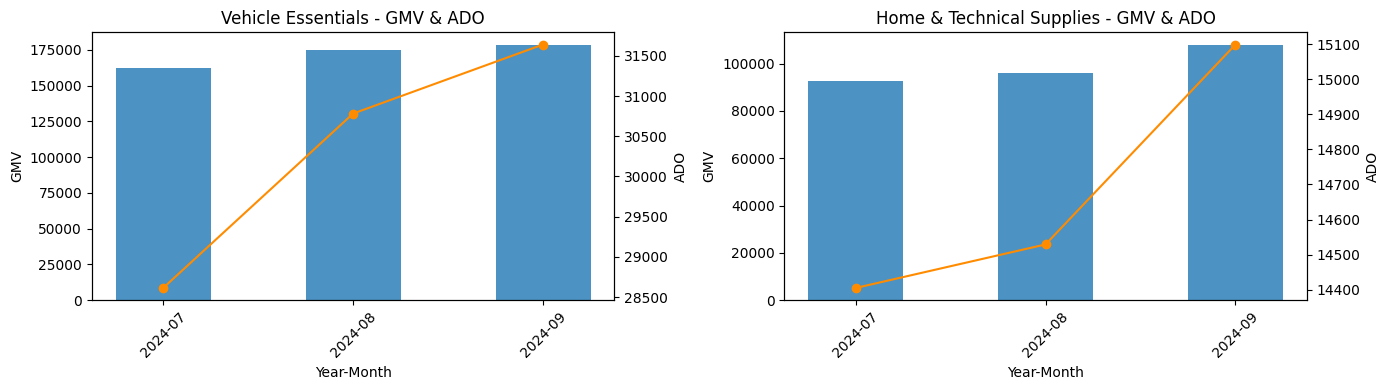

In [122]:
from IPython.display import Markdown, display
display(Markdown(insight_overview))
plot_gmv_ado_dual_chart(l1_monthly_growth)